In [1]:
emails = read.csv("emails.csv", stringsAsFactors=FALSE)


In [3]:
str(emails)

'data.frame':	5728 obs. of  2 variables:
 $ text: chr  "Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqg"| __truncated__ "Subject: the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ra"| __truncated__ "Subject: unbelievable new homes made easy  im wanting to show you this  homeowner  you have been pre - approved for a $ 454 , 1"| __truncated__ "Subject: 4 color printing special  request additional information now ! click here  click here for a printable version of our o"| __truncated__ ...
 $ spam: int  1 1 1 1 1 1 1 1 1 1 ...


In [6]:
table(emails$spam)


   0    1 
4360 1368 

In [7]:
summary(nchar(emails$text))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   13.0   508.8   979.0  1557.0  1894.0 43950.0 

In [8]:
which.min(nchar(emails$text))

[1] 1992

In [10]:
library(tm)
library(SnowballC)

Loading required package: NLP


In [11]:
corpus = Corpus(VectorSource(emails$text))
corpus = tm_map(corpus, tolower)
corpus = tm_map(corpus, PlainTextDocument)
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords, stopwords("english"))
corpus = tm_map(corpus, stemDocument)
dtm = DocumentTermMatrix(corpus)
dtm

<<DocumentTermMatrix (documents: 5728, terms: 28687)>>
Non-/sparse entries: 481719/163837417
Sparsity           : 100%
Maximal term length: 24
Weighting          : term frequency (tf)

In [12]:
spdtm = removeSparseTerms(dtm, 0.95)
spdtm

<<DocumentTermMatrix (documents: 5728, terms: 330)>>
Non-/sparse entries: 213551/1676689
Sparsity           : 89%
Maximal term length: 10
Weighting          : term frequency (tf)

In [24]:
emailsSparse = as.data.frame(as.matrix(spdtm))

In [20]:
str(emailsSparse)

'data.frame':	5728 obs. of  330 variables:
 $ 000       : num  0 0 0 0 0 0 0 0 1 0 ...
 $ 2000      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 2001      : num  0 0 0 0 0 0 0 0 1 0 ...
 $ 713       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 853       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ abl       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ access    : num  0 0 0 0 0 0 1 0 0 0 ...
 $ account   : num  0 0 0 0 0 0 1 0 0 0 ...
 $ addit     : num  0 0 0 2 0 0 1 0 0 0 ...
 $ address   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ allow     : num  0 0 0 0 0 0 1 0 0 0 ...
 $ alreadi   : num  0 0 0 0 0 0 1 0 0 0 ...
 $ also      : num  0 0 0 0 0 0 1 0 0 0 ...
 $ analysi   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ anoth     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ applic    : num  0 0 0 0 0 0 3 0 0 0 ...
 $ appreci   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ approv    : num  0 0 2 0 0 0 0 0 0 0 ...
 $ april     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ area      : num  0 0 0 0 0 0 1 0 0 0 ...
 $ arrang    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ask       : num  0 0 1 0 0 0 0

In [25]:
colnames(emailsSparse) = make.names(colnames(emailsSparse))

In [26]:
str(emailsSparse)

'data.frame':	5728 obs. of  330 variables:
 $ X000      : num  0 0 0 0 0 0 0 0 1 0 ...
 $ X2000     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2001     : num  0 0 0 0 0 0 0 0 1 0 ...
 $ X713      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X853      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ abl       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ access    : num  0 0 0 0 0 0 1 0 0 0 ...
 $ account   : num  0 0 0 0 0 0 1 0 0 0 ...
 $ addit     : num  0 0 0 2 0 0 1 0 0 0 ...
 $ address   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ allow     : num  0 0 0 0 0 0 1 0 0 0 ...
 $ alreadi   : num  0 0 0 0 0 0 1 0 0 0 ...
 $ also      : num  0 0 0 0 0 0 1 0 0 0 ...
 $ analysi   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ anoth     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ applic    : num  0 0 0 0 0 0 3 0 0 0 ...
 $ appreci   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ approv    : num  0 0 2 0 0 0 0 0 0 0 ...
 $ april     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ area      : num  0 0 0 0 0 0 1 0 0 0 ...
 $ arrang    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ask       : num  0 0 1 0 0 0 0

In [28]:
colSums(emailsSparse)

X000      X2000      X2001       X713       X853        abl     access 
      1007       4967       3089       1097        462        590        789 
   account      addit    address      allow    alreadi       also    analysi 
       829        774       1154        450        446       1864        495 
     anoth     applic    appreci     approv      april       area     arrang 
       435        567        541        648        682        489        410 
       ask     assist     associ     attach     attend      avail       back 
       871        598        777       1176        573       1152        864 
      base      begin     believ       best     better       book      bring 
       837        317        456       1291        383        756        374 
      busi        buy       call        can       case      chang      check 
      2313        442       1687       4257        561       1035        488 
     click        com       come    comment   communic    compani    complet 
       769       5443        903        531       1343       2290        707 
    confer    confirm    contact    continu   contract       copi       corp 
      1297        532       1543        552        629        797       1692 
    corpor       cost      cours      creat     credit   crenshaw    current 
       565        821        626        413        960       1115       1044 
    custom       data       date        day       deal       dear     depart 
       796        955       1187       1860        498        838        621 
     deriv     design     detail    develop     differ     direct   director 
       676        457        661       1882        598        657        705 
   discuss        doc        don       done        due        ect        edu 
      1326        675        676        337        445      11427       1627 
    effect     effort     either      email        end     energi      engin 
       471        473        318       2066        635       2179        571 
     enron        etc       even      event     expect     experi        fax 
     13388        434        622        552        554        405       1038 
      feel       file      final     financ    financi       find      first 
       543        770        490       1073        909        867        929 
    follow       form    forward       free     friday       full      futur 
      1552        664       3161       1141        854        469        722 
       gas        get     gibner       give      given       good      great 
      1070       2462        633       1055        453       1097        837 
     group      happi       hear      hello       help       high       home 
      2604        396        469        534       1430        624        660 
      hope        hou       hour    houston      howev       http       idea 
       858       5577        548       1582        545       1609        378 
    immedi     import     includ    increas   industri       info     inform 
       385        530       1238        491        970        438       2701 
  interest     intern   internet  interview     invest      invit     involv 
      1814        606        623       1333        867        647        405 
      issu       john       join       juli       just   kaminski       keep 
       944       1042        469        701       1354       4801        431 
     kevin       know       last        let       life       like       line 
       656       2614        998       1963        400       2352        448 
      link       list      locat     london       long       look        lot 
       421       1410        485        843        534       2003        348 
      made       mail       make      manag       mani       mark     market 
       622       2269       1884       2600        758        613       2750 
       may       mean       meet     member    mention     messag      might 
      2465        390       

In [29]:
sort(colSums(emailsSparse))

vkamin      begin     either       done      sorri        lot    mention 
       301        317        318        337        343        348        355 
   thought      bring       idea     better     immedi    without       mean 
       367        374        378        383        385        389        390 
     write      happi      repli       life     experi     involv     specif 
       390        396        397        400        405        405        407 
    arrang      creat       read       wish       open     realli       link 
       410        413        413        414        416        417        421 
       say    respond      sever       keep        etc      anoth        run 
       423        430        430        431        434        435        437 
      info     togeth      short     sincer        buy        due    alreadi 
       438        438        439        441        442        445        446 
      line      allow     recent    special      given     believ     design 
       448        450        451        451        453        456        457 
       put      remov       X853  wednesday       type     public       full 
       458        460        462        464        466        468        469 
      hear       join     effect     effort    tuesday     robert      locat 
       469        469        471        473        474        482        485 
     check       area      final    increas       soon    analysi       sure 
       488        489        490        491        492        495        495 
      deal     return      place      onlin    success       sinc understand 
       498        509        516        518        519        521        521 
     still     import    comment    confirm      hello       long      thing 
       523        530        531        532        534        534        535 
     point    appreci       feel      howev     member       hour        net 
       536        541        543        545        545        548        548 
   continu      event     expect    suggest       unit    resourc       case 
       552        552        554        554        554        556        561 
   version     corpor     applic      engin       part     attend   thursday 
       564        565        567        571        571        573        575 
     might       morn        abl     assist     differ     intern      updat 
       577        586        590        598        598        606        606 
      move       mark     depart       even       made   internet       high 
       612        613        621        622        622        623        624 
     cours   contract     gibner        end      right        per      invit 
       626        629        633        635        639        642        647 
    approv       real     monday     result     school      kevin     direct 
       648        648        649        655        655        656        657 
      home     detail        tri       form    problem        web        doc 
       660        661        661        664        666        668        675 
     deriv        don      april       note      relat     websit       juli 
       676        676        682        688        694        700        701 
  director    complet       rate       valu      futur    student        set 
       705        707        717        721        722        726        727 
    within     requir    softwar       book       mani     person      click 
       732        736        739        756        758        767        769 
      file      addit      money     associ   particip       term     access 
       770        774        776        777        782        786        789 
    custom    possibl       copi       oper       cost    respons      today 
       796        796        797        820        821        824        828 
   account       base      great       dear     london     friday    support 
       829        837     

In [30]:
emailsSparse$spam = emails$spam

In [37]:
hamEmails = subset(emailsSparse, spam == 0)

In [38]:
sort(colSums(hamEmails))

spam       life      remov      money      onlin    without     websit 
         0         80        103        114        173        191        194 
     click    special       wish      repli        buy        net       link 
       217        226        229        239        243        243        247 
    immedi       done       mean     design        lot     effect       info 
       249        254        259        261        268        270        273 
    either       read      write       line      begin      sorri    success 
       279        279        286        289        291        293        293 
    involv      creat    softwar     better     vkamin        say       keep 
       294        299        299        301        301        305        306 
     bring     believ       full    increas     realli    mention    thought 
       311        313        317        320        324        325        325 
      idea     invest      secur     specif      sever     experi      thing 
       327        327        337        338        340        346        347 
     allow      check        due       type      happi     return     expect 
       348        351        351        352        354        355        356 
     short     effort       open   internet     sincer     public     recent 
       357        358        360        361        361        364        368 
     anoth    alreadi       home       made    respond      given        etc 
       369        372        375        380        382        383        385 
       put     within      place      right    version      hello       sure 
       385        386        388        390        390        395        396 
      area        run     arrang    account       join       hour      locat 
       397        398        399        401        403        404        406 
    togeth      engin     import        per     corpor       high     result 
       406        411        411        412        414        416        418 
      hear      final       deal     applic       even        web     custom 
       420        422        423        428        429        430        433 
      soon       long       sinc      futur     member       X000      event 
       435        436        439        440        446        447        447 
       don       part       feel    tuesday  wednesday      still       unit 
       450        450        453        454        456        457        457 
      site       X853    continu understand    resourc     robert    analysi 
       458        461        464        464        466        466        468 
      form      point     assist    confirm     differ     intern      might 
       468        474        475        485        489        489        490 
      real       case      howev    comment        abl    complet       rate 
       490        492        496        505        515        515        516 
   appreci        tri       move      updat     approv    suggest       free 
       518        521        526        527        533        533        535 
  contract     detail       morn        end       mani     attend   thursday 
       544        546        546        550        550        558        558 
    direct     requir      cours     person      relat     depart      today 
       561        562        567        569        573        575        577 
     start        way       mark       valu    problem      peopl       note 
       580        586        588        590        593        599        600 
    school      invit     access       term       juli     monday     gibner 
       607        614        617        625        630        630        633 
      base   director      offer       cost      addit      kevin      great 
       635        640        643        646        648        654        655 
       set       file       find       much       oper      order      deriv 
       658        659       

In [39]:
spamEmails = subset(emailsSparse, spam == 1)
sort(colSums(spamEmails))

X713   crenshaw      enron     gibner   kaminski    stinson     vkamin 
         0          0          0          0          0          0          0 
      X853       vinc        doc      kevin    shirley      deriv      april 
         1          1          2          2          2          3          5 
   houston      resum        edu     friday        hou  wednesday        ect 
         5          5          7          7          8          8         10 
    arrang  interview     attend     london     robert    student    schedul 
        11         13         15         15         16         16         17 
  thursday     monday       john    tuesday     attach    suggest    appreci 
        17         19         20         20         21         21         23 
      mark      begin    comment    analysi      X2001      model       hope 
        25         26         26         27         29         29         30 
   mention      X2000     togeth     confer      invit    univers     financ 
        30         32         32         33         33         34         35 
      talk     either        run       morn      shall      happi    thought 
        38         39         39         40         40         42         42 
    depart    confirm    respond     school       corp        etc       hear 
        46         47         48         48         49         49         49 
     howev      sorri       idea     energi    discuss       open     option 
        49         50         51         55         56         56         56 
      soon understand      cours     experi     associ      point      bring 
        57         57         59         59         62         62         63 
  director   particip      anoth       join      still      final   research 
        65         65         66         66         66         68         68 
      case        set     specif      given       juli    problem        put 
        69         69         69         70         71         73         73 
   alreadi        ask        abl       deal        fax       book       team 
        74         74         75         75         75         76         76 
      issu      locat       meet      updat        lot     sincer     better 
        79         79         79         79         80         80         82 
     short       sinc       done   question     recent    possibl   contract 
        82         82         83         83         83         84         85 
       end       move       data      might    continu       note       feel 
        85         86         87         87         88         88         90 
   resourc      sever       area   communic     realli        due     direct 
        90         90         92         92         93         94         96 
    origin       copi       unit       long     member       sure      allow 
        96         97         97         98         99         99        102 
      dear     public      write      event        let     differ       file 
       104        104        104        105        107        109        111 
    involv    respons      creat       type     approv     detail     effort 
       111        113        114        114        115        115        115 
    intern    request        say     import    support       part      relat 
       117        117        118        119        120        121        121 
    assist       last        two       back       keep      addit       date 
       123        124        124        125        125        126        127 
     place      group       mean       valu      think      offic       read 
       128        130        131        131        132        133        134 
    immedi      check     applic      hello        tri     review     believ 
       136        137        139        139        140        142        143 
     phone       hour      power    present    process     corpor       oper 
       143        144       

In [40]:
emailsSparse$spam = as.factor(emailsSparse$spam)

In [41]:
library(caTools)

set.seed(123)

split = sample.split(emailsSparse$spam, SplitRatio = 0.7)

train = subset(emailsSparse, split==TRUE)
test = subset(emailsSparse, split==FALSE)

In [43]:
library(rpart)
library(rpart.plot)
CART = rpart(spam ~ ., data=train, method="class")

In [44]:
Log = glm(spam ~ ., data = train, family=binomial)

Warning message:
: glm.fit: algorithm did not convergeWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred

In [52]:
library(randomForest)
set.seed(123)
forest = randomForest(spam ~ ., data = train)

In [47]:
predictCART = predict(CART)[,2]
predictLog = predict(Log)

predictForest = predict(forest, type="prob")[,2]

In [50]:
table(predictLog < 0.00001)


FALSE  TRUE 
  954  3056 

In [49]:
table(predictLog > 0.99999)


FALSE  TRUE 
 3056   954 

In [51]:
table(predictLog < 0.99999 & predictLog > 0.00001)


FALSE 
 4010 

In [54]:
summary(Log)


Call:
glm(formula = spam ~ ., family = binomial, data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.011   0.000   0.000   0.000   1.354  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -3.082e+01  1.055e+04  -0.003    0.998
X000         1.474e+01  1.058e+04   0.001    0.999
X2000       -3.631e+01  1.556e+04  -0.002    0.998
X2001       -3.215e+01  1.318e+04  -0.002    0.998
X713        -2.427e+01  2.914e+04  -0.001    0.999
X853        -1.212e+00  5.942e+04   0.000    1.000
abl         -2.049e+00  2.088e+04   0.000    1.000
access      -1.480e+01  1.335e+04  -0.001    0.999
account      2.488e+01  8.165e+03   0.003    0.998
addit        1.463e+00  2.703e+04   0.000    1.000
address     -4.613e+00  1.113e+04   0.000    1.000
allow        1.899e+01  6.436e+03   0.003    0.998
alreadi     -2.407e+01  3.319e+04  -0.001    0.999
also         2.990e+01  1.378e+04   0.002    0.998
analysi     -2.405e+01  3.860e+04  -0.001    1.000
a

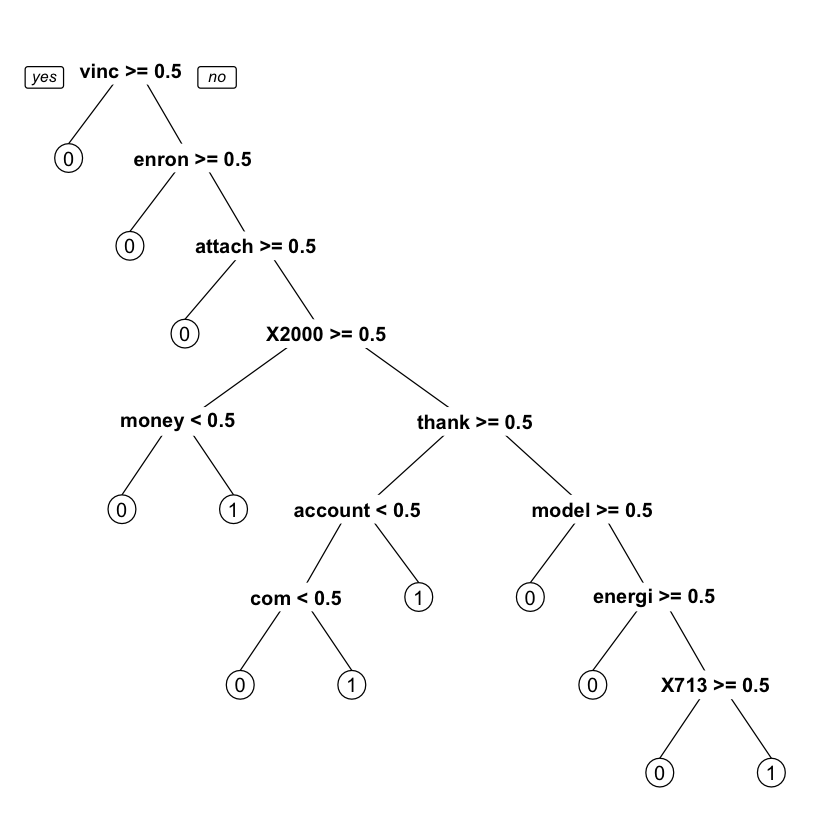

In [55]:
prp(CART)

In [56]:
table(train$spam, predictLog > 0.5)

   
    FALSE TRUE
  0  3052    0
  1     4  954

In [57]:
(3052+954)/(3052 + 954+4)

[1] 0.9990025

In [59]:
library(ROCR)
ROCRpred = prediction(predictLog, train$spam)
as.numeric(performance(ROCRpred, "auc")@y.values)

[1] 0.9999959

In [60]:
table(train$spam, predictCART > 0.5)



   
    FALSE TRUE
  0  2885  167
  1    64  894

In [62]:
(2885 + 894)/(2885 + 167+64+894)

[1] 0.942394

In [63]:

ROCRpred = prediction(predictCART, train$spam)
as.numeric(performance(ROCRpred, "auc")@y.values)

[1] 0.9696044

In [64]:
table(train$spam, predictForest > 0.5)


   
    FALSE TRUE
  0  3016   36
  1    40  918

In [65]:
(3016 + 918)/(3016 + 918+40+36)

[1] 0.9810474

In [66]:
ROCRpred = prediction(predictForest, train$spam)
as.numeric(performance(ROCRpred, "auc")@y.values)

[1] 0.9978889

In [67]:
predictCARTTest = predict(CART, newdata=test)[,2]
predictLogTest = predict(Log, newdata=test)

predictForestTest = predict(forest, , newdata=test,type="prob")[,2]

In [69]:
table(test$spam, predictLogTest > 0.5)

   
    FALSE TRUE
  0  1258   50
  1    34  376

In [70]:
(1258 + 376)/ (1258+50+34+376)

[1] 0.9511059

In [71]:
ROCRpred = prediction(predictLogTest, test$spam)
as.numeric(performance(ROCRpred, "auc")@y.values)

[1] 0.9767994

In [72]:
table(test$spam, predictCARTTest > 0.5)

   
    FALSE TRUE
  0  1228   80
  1    24  386

In [73]:
(1228 + 386)/(1228+386+24+80)

[1] 0.9394645

In [74]:
ROCRpred = prediction(predictCARTTest, test$spam)
as.numeric(performance(ROCRpred, "auc")@y.values)

[1] 0.963176

In [75]:
table(test$spam, predictForestTest > 0.5)

   
    FALSE TRUE
  0  1290   18
  1    25  385

In [77]:
(1290 +385)/(1290+385+25+18)

[1] 0.9749709

In [78]:
ROCRpred = prediction(predictForestTest, test$spam)
as.numeric(performance(ROCRpred, "auc")@y.values)

[1] 0.9975656